In [1]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

2025-11-06 22:57:25.085031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762466245.113541  130282 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762466245.121998  130282 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762466245.211035  130282 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762466245.211079  130282 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762466245.211081  130282 computation_placer.cc:177] computation placer alr

# Tell the time network on smaller Dataset
## Starting with regression approach

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
X = np.load('A1_data_150/images.npy')
X = X/255
y = np.load('A1_data_150/labels.npy')

In [4]:
y_min = np.array([i *60 +j for i,j in y])
y_hour_min = np.array([(i + j/60) for i, j in y])
y_cycle = np.array([[np.sin((2*np.pi*i)/720),np.cos((2*np.pi*i)/720)] for i in y_min])

In [5]:
y_reg = y_cycle

In [6]:
print(y_reg.mean(), y_reg.std())

-1.2631870857957337e-17 0.7071067811865476


In [7]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X,y_reg,test_size=0.1) 

In [8]:
model = keras.Sequential()
shape = X_reg_train.shape[1:]
input_shape = shape + (1,)

In [9]:
model.add(layers.Conv2D(filters=16,kernel_size=(5,5),input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=32, kernel_size=(5,5)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
# model.add(layers.Dropout(0.3))

model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dropout(0.3))

model.add(layers.Dense(2, activation="linear"))

/home/jaspe/miniconda3/envs/tf_gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762466251.003662  130282 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:07:00.0, compute capability: 8.6


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss="mse", metrics=["mae"])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 146, 146, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 69, 69, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 69, 69, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921,090 (7.33 MB)

 Trainable params: 1,920,738 (7.33 MB)

 Non-trainable params: 352 (1.38 KB)

In [12]:
hist = model.fit(
    X_reg_train,y_reg_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32
)

Epoch 1/100


I0000 00:00:1762466258.341906  130352 service.cc:152] XLA service 0x7b7ce0003f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762466258.341954  130352 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-11-06 22:57:38.418709: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762466258.729904  130352 cuda_dnn.cc:529] Loaded cuDNN version 90101
2025-11-06 22:57:39.405297: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1337', 12 bytes spill stores, 12 bytes spill loads

2025-11-06 22:57:39.418355: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1337'

  9/456 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 16.5780 - mae: 3.0985

I0000 00:00:1762466263.497842  130352 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


448/456 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8506 - mae: 0.8728

2025-11-06 22:57:48.477603: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1337', 12 bytes spill stores, 12 bytes spill loads

2025-11-06 22:57:48.724147: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1337', 4 bytes spill stores, 4 bytes spill loads



456/456 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 0.7959 - mae: 0.6886 - val_loss: 0.4778 - val_mae: 0.6049
Epoch 2/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3537 - mae: 0.4980 - val_loss: 0.3140 - val_mae: 0.4574
Epoch 3/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2626 - mae: 0.4198 - val_loss: 0.2321 - val_mae: 0.3928
Epoch 4/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2226 - mae: 0.3814 - val_loss: 0.4708 - val_mae: 0.5559
Epoch 5/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1852 - mae: 0.3441 - val_loss: 0.1720 - val_mae: 0.3270
Epoch 6/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1474 - mae: 0.3014 - val_loss: 0.2590 - val_mae: 0.3947
Epoch 7/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1141 - mae: 0.2614 - val_loss: 0.1443 - val_mae: 0.2953
Epoch 8/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0873 - mae: 0.2268 - val_loss: 0.1203 - val_mae: 0.2678
Epoch 9/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - los

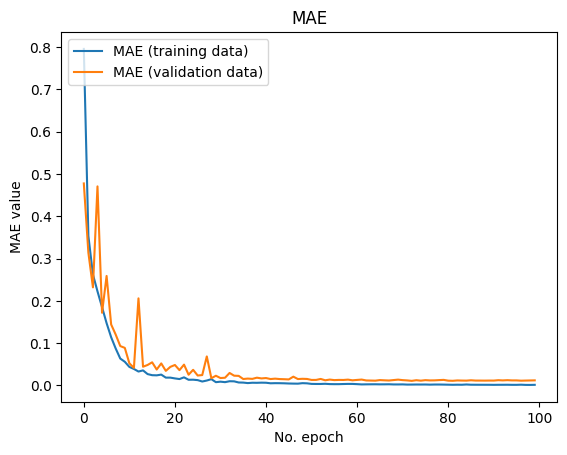

In [13]:
import matplotlib.pyplot as plt

# Plot history: MAE
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
def decode_target_vals(y):
    angles_pred = np.arctan2(y[:, 0], y[:, 1])
    decoded = (angles_pred / (2 * np.pi)) * 720
    return (decoded+720)%720

y_reg_pred = model.predict(X_reg_test)
y_reg_test = decode_target_vals(y_reg_test)
y_reg_pred = decode_target_vals(y_reg_pred)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [18]:
error = np.abs(y_reg_pred - y_reg_test)
error = np.minimum(error, 720 - error)
mae = np.mean(error)
print("Mean Absolute Error (in minutes):", mae)

Mean Absolute Error (in minutes): 9.967491743299695
